# Analyzing Ultimate Frisbee

### By Jackie Martinez, Ryan Kerr, Emily Houlihan, Karine Hsu

# Table of Contents

* [Data Parsing and Cleaning](#Data-Parsing-and-Cleaning)
* [Exploratory Analysis](#Exploratory-Analysis)
    * [Distribution of Time Elapsed per Point by Team](#Distribution-of-Time-Elapsed-per-Point-by-Team)
    * [Points Broken Per Team](#Points-Broken-Per-Team)
    * [Importance of the pull](#Importance-of-the-pull)
    * [Player Statistics](#Player-Statistics)
* [Player Clustering](#Player-Clustering)
    * [Calculating player statistics](#Calculating-player-statistics)
    * [4 cluster model](#4-cluster-model)
    * [5 cluster model](#5-cluster-model)
* [Point Clustering](#Point-Clustering)
* [Twitter Analysis](#Twitter-Analysis)

# Data Parsing and Cleaning

The American Ultimate Disc League (AUDL) is a professional ultimate frisbee league in North America. The data we worked with came from the 2015 AUDL Website http://theaudl.com/stats/allstandings, which consisted of 25 teams with around 800 players total, and data on a point-by-point basis for each game.

The data came in 25 separate CSV files for each team and the games they played. We first had to add a column with the team name and combine the files into one.

In [1]:
import numpy as np
import pandas as pd
import pdb
import csv
import glob
import re
pd.set_option('display.max_columns', None)

In [16]:
# script to add team name to respective team CSV
# this script goes through 25 CSVs for all 25 AUDL teams
for files in westfiles:
    with open(files, 'r') as finput:
        with open('Formatted'+files, 'w') as foutput:

            writer = csv.writer(foutput, lineterminator='\n')
            reader = csv.reader(finput)

            all = []
            row = next(reader)
            row.append('Team')
            all.append(row)


            for row in reader:
                row.append(re.split('2015',files)[0])
                all.append(row)

            writer.writerows(all)

In [17]:
# combine individual team CSV files into one large CSV
frame = pd.DataFrame()
list_ = []
for file_ in glob.glob("Formatted*.csv"):

    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
    frame = pd.concat(list_)
frame.to_csv('combined.csv', encoding='utf-8')


### Making dataframe for Twitter and AUDL player data

In [3]:
combined_dict = pd.read_csv("combined_dict.csv")

In [4]:
combined_dict.head(3)

,site_name,full_name
0,A Drews,Adam Drews
1,A Mesh,Andrew Meshnick
2,S Meyer,Seth Meyer


In [9]:
# script to write into dictionary
import csv
with open('combined_dict.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('combined_dict2.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        playerdict = {rows[0]:rows[1] for rows in reader}
        

# Exploratory Analysis

In our exploratory analysis, we aimed to answer a few questions about our favorite sport - ultime. Going through a game of ultimate, where the defensive team first pulls, then a point is played until 15 points or ends after a certain amount time, we aimed to figure out these questions: 

1. Does the length of time of a point tell us anything about the performance of a team? 
2. Does the percentage of points broken when on offense or defense tell us anything about a team?
3. Does the length of time of a pull (the throw that starts the point) matter? Is it good or bad to pull out of bounds?
4. What do statistics like, goals, assists, or throwaways, tell us about a player? 

### Looking at team data

In [3]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

combined = pd.read_csv('combined.csv')
goals_combined = combined[combined["Action"] == "Goal"]

In [4]:
goals_combined.head(5)

,Unnamed: 0,Date/Time,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,Receiver,Defender,Hang Time (secs),Player 0,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6,Player 7,Player 8,Player 9,Player 10,Player 11,Player 12,Player 13,Player 14,Player 15,Player 16,Player 17,Player 18,Player 19,Player 20,Player 21,Player 22,Player 23,Player 24,Player 25,Player 26,Player 27,Elapsed Time (secs),Team
5,5,2015-04-12 13:09,NaN,Charlotte Express,27,O,1,0,Offense,Goal,Dylan T,Matt S,NaN,NaN,Kyle S,Dylan T,Matt S,B Hannah,J Clark,F Wooten,B. Moore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,AtlantaHustle
7,7,2015-04-12 13:09,NaN,Charlotte Express,9,D,1,1,Defense,Goal,NaN,NaN,Anonymous,NaN,TGoforth,R James,R Runner,S. Hicks,Archie,B. Liu,Jack K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,AtlantaHustle
19,19,2015-04-12 13:09,NaN,Charlotte Express,53,O,2,1,Offense,Goal,B Hannah,J Clark,NaN,NaN,Kyle S,Dylan T,Matt S,B Hannah,J Clark,F Wooten,B. Moore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181,AtlantaHustle
28,28,2015-04-12 13:09,NaN,Charlotte Express,54,D,3,1,Offense,Goal,Breault,R James,NaN,NaN,R James,Breault,R Runner,S. Hicks,Archie,B. Liu,Jack K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,AtlantaHustle
31,31,2015-04-12 13:09,NaN,Charlotte Express,27,D,4,1,Offense,Goal,Matt K.,D Cox,NaN,NaN,TGoforth,Breault,R Runner,D Cox,RBradham,Archie,Matt K.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358,AtlantaHustle


## Distribution of Time Elapsed per Point by Team

83.122362110311755

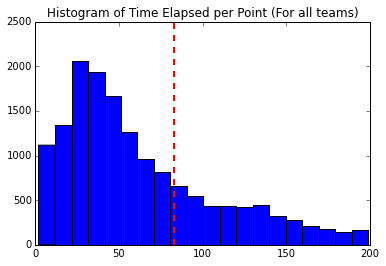

In [177]:
%matplotlib inline

#distribution of points 
point_combined = goals_combined['Point Elapsed Seconds'].values

plt.hist(point_combined[point_combined <200],bins=20)
plt.title('Histogram of Time Elapsed per Point (For all teams)')
plt.axvline(point_combined.mean(), color='r', linestyle='dashed', linewidth=2)

Before we look at distribution per team, we first wanted to look at the distribution of all teams. This histogram shows us that the most common length of time for a point is 35 seconds, whereas the mean is 83 seconds. The distribution is as we expected -  the distribution to be right skewed because there are more short points than long points.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

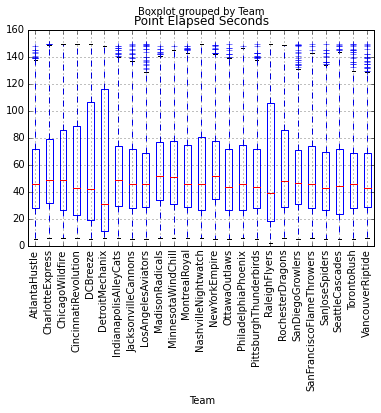

In [178]:
filtered = goals_combined[goals_combined['Point Elapsed Seconds']<=150]
filtered.boxplot('Point Elapsed Seconds', 'Team')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


This boxplot grouped by Team shows that most teams play the middle 50% of their points between 15 and 80 seconds. Detroit Mechanix seems to have a large range, meaning they are pretty variable in their playing time. This could be due to wind, or just overall variability in player skills. The winners of each region are the San Jose Spiders, Toronto Rush, Madison Radicals, and Raleigh Flyers. Looking at each of these teams, it is interesting to note that they all have around the same time in seconds distribution.

## Points Broken Per Team

In ultimate, we use a term called 'broken' to represent when a team starts on either offense or defense and then switches to defense or offense respectively. 

In [19]:
# break_array are the percentage of points broken starting on defense
# broken_array are the percentage of points broken starting on offense
teams = np.unique(goals_combined['Team'])
break_array = []
broken_array = []
for teamname in teams[1:25]:
    team = goals_combined[goals_combined['Team'] == teamname]
    o_line = team[team["Line"] == "O"]
    broken = o_line["Event Type"][o_line["Event Type"] == "Defense"]
    d_line = team[team["Line"] == "D"]
    breaks = d_line["Event Type"][d_line["Event Type"] == "Offense"]
    broken_array.append(broken.shape[0] / float(o_line.shape[0]))
    break_array.append(breaks.shape[0] / float(d_line.shape[0]))

#creating a dictionary with team names and break percentages
break_dict = dict(zip(teams[1:25],break_array))
broken_dict = dict(zip(teams[1:25],broken_array))

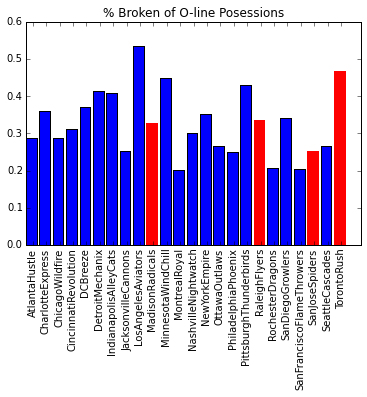

In [37]:
%matplotlib inline
h = plt.bar(xrange(len(teams[1:25])), broken_dict.values())
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos,teams[1:25])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

#denote regional winners San Jose Spiders, Toronto Rush, Madison Radicals, and Raleigh Flyers
h[21].set_color('r')
h[23].set_color('r')
h[9].set_color('r')
h[17].set_color('r')
plt.title('% Broken of O-line Posessions')

The red bars denote the regional winners. Interestingly, the San Jose Spiders, the 2015 AUDL winner were broken on about 25% of their O line posessions. We would have expected much lower. Even the regional winners seemed to have variable percent broken on O-line possessions. 

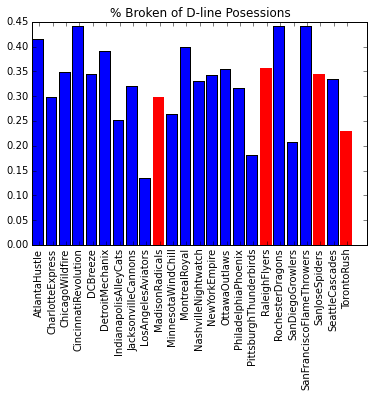

In [44]:
h = plt.bar(xrange(len(teams[1:25])), break_dict.values())
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos,teams[1:25])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

#denote regional winners San Jose Spiders, Toronto Rush, Madison Radicals, and Raleigh Flyers
h[21].set_color('r')
h[23].set_color('r')
h[9].set_color('r')
h[17].set_color('r')
plt.title('% Broken of D-line Posessions')


Again, the red bars denote the regional winners. Interestingly, the San Jose Spiders, the 2015 AUDL winner were broken on about 31% of their D-line posessions, and also had ~40 more D points than O points. This seems like a pretty good precentage to me. It seems that the teams with relatively high percentages of Broken D-Line possessions are better teams. This makes sense because teams want to score on offense.

## Importance of the pull

In order to determine the importance of a pull, we created a data frame with stats for each point and whether or not the point was won. 

In [5]:
actions = set(combined["Action"])
print "There are the possible actions that can occur ", actions
# get the actions that can start a point, cause a turn, or end a point.
actions_start = ["Pull", "PullOb", "OpponentPull", "OpponentPullOb"]
actions_turn = ["Stall", "Throwaway", "D", "Drop"]
actions_end = ["EndOfThirdQuarter", 'EndOfFirstQuarter', "Goal", "GameOver",
               "HalfTime", "Callahan", "EndOfFourthQuarter", "End of Overtime"]

There are the possible actions that can occur  set(['EndOfThirdQuarter', 'Pull', 'EndOfFirstQuarter', 'PullOb', 'Goal', 'GameOver', 'OpponentCatch', 'Drop', 'OpponentPull', 'OpponentPullOb', 'Halftime', 'Stall', 'MiscPenalty', 'Callahan', 'Catch', 'EndOfFourthQuarter', 'Throwaway', 'EndOfOvertime', 'D'])


In [6]:
# beginning df structure
cols = {"team": [], "offense": [], "turns" : [], "pull": [], "pull-ob": [], "ds":[], "won": [], "pull_time" : [], "point_time": [], "num_throws":[]}

# names of columns in df made easier.
ours = "Our Score - End of Point"
theirs = "Their Score - End of Point"

# for each throw, determine if it's the end of a point, or a turn, and update accordingly
def parse_throw(row):
    if parse_throw.newpt:
        cols["team"] += [row.Team]
        cols["offense"].append(row.Line == 'O')
        cols["turns"] += [0]
        cols["ds"] += [0]
        cols['pull'].append(row.Action == "Pull")
        cols["pull-ob"].append(row.Action == "PullOb" or row.Action == "OpponentPullOb")
        cols['pull_time'] += [row['Hang Time (secs)']]
        cols["point_time"] += [row["Point Elapsed Seconds"]]
        cols["num_throws"] += [0]
        parse_throw.index += 1
        if parse_throw.prev == row[ours] - 1:
            cols["won"] += [True]
        elif parse_throw.prev_opp == row[theirs] - 1:
            cols["won"] += [False]
        else:
            cols["won"] += [row[ours] == 1]
    if row.Action in actions_turn:
        cols["turns"][parse_throw.index-1] += 1
    if row.Action == "D":
        cols["ds"][parse_throw.index-1] += 1
    cols["num_throws"][parse_throw.index-1] += 1
    parse_throw.newpt = (row.Action in actions_end)
    parse_throw.prev = row[ours]
    parse_throw.prev_opp = row[theirs]
# set default values for some fuction params
parse_throw.index = 0
parse_throw.num_throws = 0
parse_throw.prev = None
parse_throw.prev_opp = None
parse_throw.newpt = True

# apply and create our new df.
combined.apply(lambda x: parse_throw(x), axis=1)
points = pd.DataFrame(cols)

In [7]:
points.head(10)

,ds,num_throws,offense,point_time,pull,pull-ob,pull_time,team,turns,won
0,0,6,True,27,False,False,NaN,AtlantaHustle,0,True
1,0,2,False,9,True,False,6.206,AtlantaHustle,0,False
2,0,12,True,53,False,False,NaN,AtlantaHustle,0,True
3,0,9,False,54,True,False,5.172,AtlantaHustle,1,True
4,0,3,False,27,True,False,7.285,AtlantaHustle,1,True
5,0,2,False,61,True,False,6.779,AtlantaHustle,0,False
6,0,4,True,44,False,False,NaN,AtlantaHustle,1,False
7,2,12,True,121,False,False,NaN,AtlantaHustle,5,False
8,0,8,True,92,False,False,NaN,AtlantaHustle,2,True
9,0,5,False,62,True,False,6.575,AtlantaHustle,1,True


### Logistic Regression

Let's go ahead and run logistic regression on the entire data set to see if there is a correlation between pull time  and if the point is won or not, and see how accurate it is!

In [8]:
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
pulltime = points['pull_time'][pd.notnull(points['pull_time'])]
pulltime = np.ravel(pulltime)
won = points['won'][pd.notnull(points['pull_time'])]
won = np.ravel(won)

pulltime_array = []
for i in pulltime:
    pulltime_array.append([pulltime[i]])

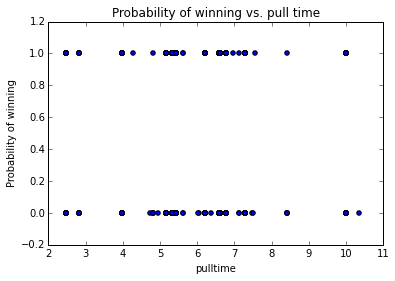

In [13]:
plt.scatter(pulltime_array,won)
plt.xlabel('pulltime')
plt.ylabel('Probability of winning')
plt.title('Probability of winning vs. pull time')

In [134]:
logreg = LogisticRegression()
logreg.fit(pulltime_array, won)
logreg.score(pulltime_array, won)

0.69093804284887084

69% accuracy seems good, but what's the null error rate?

In [136]:
won.mean()

0.30906195715112911

Only 31% of the pulls were points that were won, which means that you could obtain 69% accuracy by always predicting "lost" for the point. So we're doing about the same as the null error rate, which isn't great.

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

#evaluate the model by splitting into test and training set

X_train, X_test, y_train, y_test = train_test_split(pulltime_array, won, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(pulltime_array, won)

0.69093804284887084

In [142]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
print probs

[[ 0.69071978  0.30928022]
 [ 0.69242827  0.30757173]
 [ 0.69012965  0.30987035]
 ..., 
 [ 0.69007221  0.30992779]
 [ 0.69080835  0.30919165]
 [ 0.68939766  0.31060234]]


Now let's generate some evaluation metrics.

In [143]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.691268692716
0.498639763608


The accuracy is about 69%, which is the same as we experienced when training and predicting on the same data.

## Model Evaluation Using Cross-Validation

In [152]:
scores = cross_val_score(LogisticRegression(), pulltime_array, won, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.69075145  0.69075145  0.69075145  0.69030391  0.69030391  0.69130435
  0.69130435  0.69130435  0.69130435  0.69130435]
0.690938388915


To see if accuracy holds up more rigorously, we used cross-validation. Looks good - it's still performing at 69% accuracy.

## Predicting the Probability of Winning the Point

Just for fun, let's predict the probability of winning the point given a 5 second pull time and a 35 second pull time. 

In [151]:
model.predict_proba(np.array([5])), model.predict_proba(np.array([35]))

(array([[ 0.68991247,  0.31008753]]), array([[ 0.70482579,  0.29517421]]))

The predicted probability of winning a point is 31% and 30%, which are not very different. This shows that pull time does not seem to correlate with winning the point.

# Player Statistics

RYAN TO FILL IN

# Player Clustering

Is it possible to separate AUDL players into groups based on their role and playstyle?

Only 6 of the 24 AUDL teams have rosters with player positions specified, and some teams have different position names than others. These teams may be useful later, but it looks like we do not have suffieicnt information to do traditional classification. Instead we will have to take a clustering/unsupervised learning approach to identify different groups of players.

The teams with player positions on their rosters:
http://www.myalleycats.com/#!team/c10ek
http://the-dcbreeze.com/2016-roster-2/
https://www.laaviators.com/2015-roster/
http://ottawaoutlaws.com/team/roster/
http://torontorush.com/club/toronto-rush/
http://www.sdgrowlers.com/roster/

From the outset, we suspect that AUDL teams follow traditional ultimate schemes where players are split into offense/defense and handlers/cutters. This is the perfect appication for unsupervised clustering, as we expect that these groups exist but we do not have data for all players for it.

## Playing with sklearn.cluster.KMeans

In [153]:
import scipy as sc
import matplotlib.pyplot as plt
import pdb

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.cluster import KMeans
from sklearn import datasets

from scipy.spatial.distance import cdist, euclidean
from scipy.stats import percentileofscore

pd.set_option('display.max_columns', None)

In [154]:
%%bash 
ls South

AtlantaHustle2015-stats.csv
CharlotteExpress2015-stats.csv
JacksonvilleCannons2015-stats.csv
NashvilleNightwatch2015-stats.csv
RaleighFlyers2015-stats.csv


In [155]:
# we'll test all of this with just Raleigh Flyers data
raleigh = pd.read_csv("South/RaleighFlyers2015-stats.csv")

For our k-means algorithm we want an n_item x n_feature matrix where each of the items is a player and each of the features is a statistical parameter that we think will help us cluster. This means that we need to decide what parameters we are interested in. I propose:
- Percentage of points played that were O points
- Percentage of points where player scores a goal
- Percentage of points where player earns an assist

In [156]:
def clean_df(df):
    """Removes rows with improperly formatted data
    
    df: pandas dataframe with throw-by-throw data
    
    returns: pandas df"""
    
    df = df[pd.isnull(df["Player 2"]) == False]
    return df[pd.isnull(df["Player 1"]) == False]

In [157]:
def get_players(df):
    """returns list of all players present in throw-by throw pandas dataframe"""
    players = pd.unique(df.loc[0:, "Player 0": "Player 27"].values.ravel())
    return [player for player in players if not pd.isnull(player)]

In [158]:
get_players(clean_df(raleigh))

['Snoke D',
 'Bowen J',
 'Tarasi D',
 'Mitche T',
 'Nether J',
 'Dieter B',
 'Casey B',
 'Clark B',
 'Matthe R',
 'Hastin J',
 'Zhou M',
 'Colema J',
 'Snell B',
 'Moore M',
 'Chandl D',
 'McGoog J',
 'Maxsta X',
 'Richar D',
 'Green T',
 'Cretel J',
 'Bender S',
 'Pope T',
 'Allen J',
 'Goode R',
 'Hartzo J',
 'Neve M',
 'Willia J',
 'Saul N',
 'Lin M',
 'McAlis T',
 'Taylor H',
 'Ryan A',
 'Stumpf M',
 'Cooper S',
 'Poulos S',
 'Colicc C',
 'Weeks P',
 'Jessi J']

In [159]:
def summarize_points(df):
    """Gives point-by-point summaries
    
    df: pandas dataframe throw-by-throw data
    
    returns: pandas dataframe"""
    
    return df.groupby(["Date/Time", "Our Score - End of Point", "Their Score - End of Point"]).last().reset_index() 

In [160]:
summarize_points(raleigh).head(3)

,Date/Time,Our Score - End of Point,Their Score - End of Point,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Event Type,Action,Passer,Receiver,Defender,Hang Time (secs),Player 0,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6,Player 7,Player 8,Player 9,Player 10,Player 11,Player 12,Player 13,Player 14,Player 15,Player 16,Player 17,Player 18,Player 19,Player 20,Player 21,Player 22,Player 23,Player 24,Player 25,Player 26,Player 27,Elapsed Time (secs)
0,2015-04-11 18:59,0,1,AUDL,Atlanta Hustle,16,D,Defense,Goal,NaN,NaN,Anonymous,4,Clark B,Matthe R,Green T,Cretel J,Zhou M,Bender S,Pope T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,2015-04-11 18:59,0,2,AUDL,Atlanta Hustle,41,O,Defense,Goal,Allen J,Anonymous,Anonymous,NaN,Bowen J,Snoke D,Mitche T,Tarasi D,Dieter B,Casey B,Allen J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
2,2015-04-11 18:59,1,2,AUDL,Atlanta Hustle,65,O,Offense,Goal,Snoke D,Neve M,Anonymous,NaN,Snoke D,Goode R,Tarasi D,Chandl D,Neve M,Cretel J,Allen J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225


## Calculating Player Summaries

In [168]:
def player_summaries(df):
    """Summarize statistics for all players
    
    df: pandas dataframe with throw-by-throw data
    
    returns: pandas dataframe"""
    
     # does not mutate the original
    df = clean_df(df)
    
    players = get_players(df)
    stats = {"team"      : "",
             "goals"     : 0,
             "assists"   : 0,
             "ds"        : 0,
             "throwaways": 0,
             "drops"     : 0,
             "opoints"   : 0,
             "dpoints"   : 0}
    team_stats = {player: dict(stats) for player in players}
    
    # to keep track of the column number
    cols = list(df.columns)
    passer   = cols.index("Passer")
    receiver = cols.index("Receiver")
    p0       = cols.index("Player 0")
    p27      = cols.index("Player 27")
    line     = cols.index("Line")
    
    
    # add goals and assists
    ogoals = df[(df.Action == "Goal") & (df["Event Type"] == "Offense")]
    for row in ogoals.values:
        # we have try/execpt here for unpredictable data impurities
        # eg: "Anonymous" for one of the assists, stat-keeper must
        # have not known who threw it (?) callahan?
        try: team_stats[row[passer]]["assists"] += 1
        except: pass
        try: team_stats[row[receiver]]["goals"]  += 1
        except: pass
        
    # add D's
    ds = df.Defender[df.Action == "D"]
    for player in ds:
        try: team_stats[player]["ds"] += 1
        except: pass
        
        
    # add turnovers and drops
    turns = df[((df.Action == "Throwaway") & (df["Event Type"] == "Offense")) | (df.Action == "Drop") ]
    for row in turns.values:
        if row[8] == "Throwaway":
            try: team_stats[row[passer]]["throwaways"] += 1
            except: pass
        else:
            try: team_stats[row[receiver]]["drops"]     += 1
            except: pass
    
    # add points
    point_summaries = summarize_points(df)
    line = list(point_summaries.columns).index("Line")
    for row in point_summaries.values:
        player_cols = row[p0:p27]
        players = [player for player in player_cols if not pd.isnull(player)]
        if row[line] == "O":
            for player in players:
                team_stats[player]["opoints"] += 1
        else:
            for player in players:
                team_stats[player]["dpoints"] += 1
                
    summary = pd.DataFrame.from_dict(team_stats, orient="index")
    summary = summary[["team", "goals", "assists", "ds", "throwaways", "drops", "opoints", "dpoints"]]
    summary["totalpoints"] = summary["opoints"] + summary["dpoints"]
    summary["pct_opoints"] = summary["opoints"] / [float(x) for x in summary["totalpoints"]]
    summary["pct_goal"]    = summary["goals"]   / [float(x) for x in summary["totalpoints"]]
    summary["pct_assist"]  = summary["assists"] / [float(x) for x in summary["totalpoints"]]
    summary["pct_d"]       = summary["ds"]      / [float(x) for x in summary["totalpoints"]]
    
    return summary

In [171]:
summary_ral = player_summaries(raleigh)
summary_ral.head()

,team,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_goal,pct_assist,pct_d
Allen J,,62,60,14,35,5,299,119,418,0.715311,0.148325,0.143541,0.033493
Bender S,,7,16,6,10,4,18,219,237,0.075949,0.029536,0.067511,0.025316
Bowen J,,62,49,7,27,10,288,50,338,0.852071,0.183432,0.144970,0.020710
Casey B,,17,38,2,20,2,240,37,277,0.866426,0.061372,0.137184,0.007220
Chandl D,,16,7,4,5,4,80,122,202,0.396040,0.079208,0.034653,0.019802


We now have the matrix with the preliminary statistics we want to cluster on. Let's try kmeans and see what we can see.

In [172]:
cluster_cols = summary_ral[["pct_opoints", "pct_goal", "pct_assist"]]
model = KMeans(n_clusters=5).fit(cluster_cols.values)
summary_ral["cluster"] = model.labels_
summary_ral.groupby("cluster").count()

,team,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_goal,pct_assist,pct_d
cluster,,,,,,,,,,,,,
0,16,16,16,16,16,16,16,16,16,16,16,16,16
1,7,7,7,7,7,7,7,7,7,7,7,7,7
2,6,6,6,6,6,6,6,6,6,6,6,6,6
3,5,5,5,5,5,5,5,5,5,5,5,5,5
4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [173]:
summary_ral.groupby("cluster").mean()

,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_goal,pct_assist,pct_d
cluster,,,,,,,,,,,,
0,5.500000,3.437500,6.000000,3.250000,0.937500,7.062500,120.500000,127.562500,0.046172,0.043458,0.023935,0.048465
1,6.428571,5.285714,3.000000,4.857143,1.857143,48.142857,54.428571,102.571429,0.465185,0.070970,0.051329,0.026445
2,26.500000,30.333333,7.166667,17.333333,5.166667,235.833333,44.333333,280.166667,0.847896,0.090626,0.107403,0.023243
3,23.400000,22.800000,8.000000,13.600000,2.800000,144.400000,64.200000,208.600000,0.678828,0.107672,0.102165,0.043431
4,3.500000,8.750000,7.000000,9.250000,1.500000,29.500000,117.750000,147.250000,0.195561,0.028462,0.040614,0.078472


Let's try to use the elbow method to see what the optimal number of clusters is

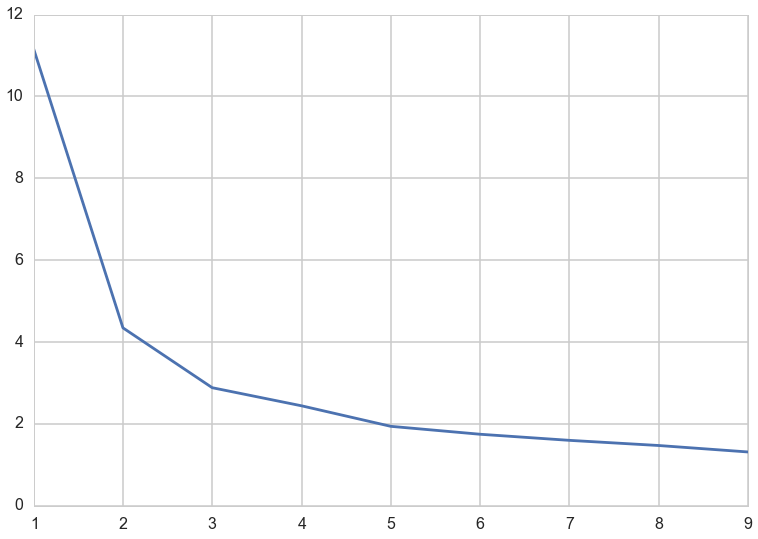

In [174]:
num_clusters = range(1, 10)
models = [KMeans(n_clusters = x) for x in num_clusters]
def score_from_model(model):
    predicted = model.fit_predict(cluster_cols.values)
    centroids = [model.cluster_centers_[x] for x in predicted]
    dist_sum = 0
    for i in range(0, len(predicted)):
        dist_sum += euclidean(cluster_cols.values[i], centroids[i])
    return dist_sum
scores = [score_from_model(model) for model in models]
scores

plt.plot(num_clusters, scores)

## Trying all of this with team-combined csv

In [175]:
combined_new = clean_df(combined)
combined_new = combined_new.drop("Unnamed: 0", axis=1)

In [176]:
all_players = player_summaries(combined_new)
all_players["goal_percentile"] = [percentileofscore(all_players["pct_goal"], x) / 100.0 for x in all_players["pct_goal"]]
all_players["assist_percentile"] = [percentileofscore(all_players["pct_assist"], x) / 100.0 for x in all_players["pct_assist"]]
cluster_cols = all_players[["pct_opoints", "goal_percentile", "assist_percentile"]]

After reading in the data we'll use k-means to create player clusters. We will first explore using the elbow method to see if there is an optimal number of clusters.

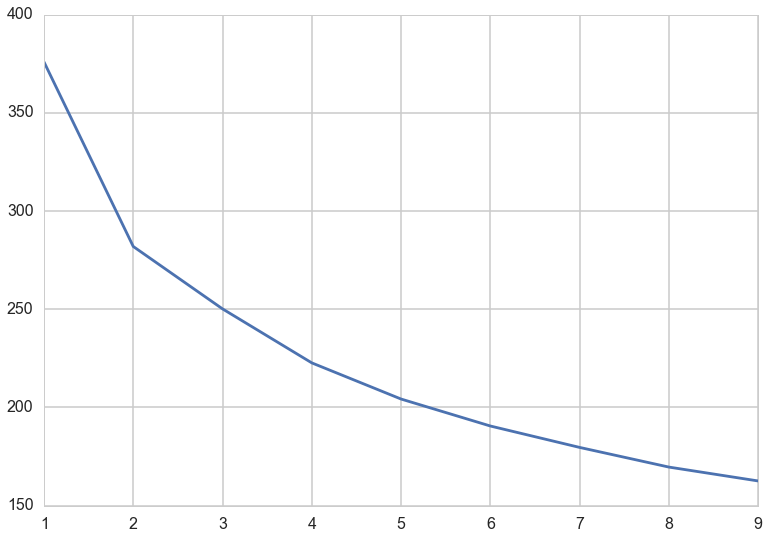

In [177]:
num_clusters = range(1, 10)
models = [KMeans(n_clusters = x) for x in num_clusters]
def score_from_model(model):
    predicted = model.fit_predict(cluster_cols.values)
    centroids = [model.cluster_centers_[x] for x in predicted]
    dist_sum = 0
    for i in range(0, len(predicted)):
        dist_sum += euclidean(cluster_cols.values[i], centroids[i])
    return dist_sum
scores = [score_from_model(model) for model in models]
scores

plt.plot(num_clusters, scores)

There doesn't seem to be an obvious "elbow" for us to separate clusters into. Perhaps we could say that the elbow is at 2, but that would most likely just be splitting players into clusters by offense/defense. We know we want at least four (offensive handler, offensive cutter, defensive handler, defensive cutter), so that should be a lower bound. Let's take a look at what the clusters end up being for a few cases.

## 4 cluster model

In [178]:
model = KMeans(n_clusters=4).fit(cluster_cols.values)
all_players["cluster"] = model.labels_
all_players.groupby("cluster").count().iloc[0:, 0]

cluster
0    145
1    222
2    194
3    216
Name: team, dtype: int64

In [179]:
all_players.groupby("cluster").mean()

,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_goal,pct_assist,pct_d,goal_percentile,assist_percentile
cluster,,,,,,,,,,,,,,
0,5.358621,14.427586,5.027586,15.668966,2.048276,113.510345,55.475862,168.986207,0.677683,0.029975,0.083276,0.028577,0.286979,0.658514
1,2.644144,3.581081,4.099099,4.743243,1.108108,20.945946,84.891892,105.837838,0.195967,0.021328,0.027461,0.035106,0.211587,0.279155
2,23.505155,20.664948,6.886598,15.051546,3.670103,153.525773,49.572165,203.097938,0.754226,0.115208,0.098855,0.033672,0.804376,0.743684
3,11.083333,6.550926,7.791667,6.060185,1.708333,36.828704,104.472222,141.300926,0.246165,0.082355,0.042592,0.049824,0.668365,0.404020


## 5 cluster model

In [180]:
model = KMeans(n_clusters=5).fit(cluster_cols.values)
all_players["cluster"] = model.labels_
all_players.groupby("cluster").count().iloc[0:, 0]

cluster
0    186
1    170
2    168
3    140
4    113
Name: team, dtype: int64

In [181]:
all_players.groupby("cluster").mean()

,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_goal,pct_assist,pct_d,goal_percentile,assist_percentile
cluster,,,,,,,,,,,,,,
0,24.129032,19.951613,6.854839,14.236559,3.639785,150.655914,50.376344,201.032258,0.745278,0.119158,0.096959,0.033809,0.821647,0.735760
1,2.335294,2.188235,3.570588,3.788235,1.035294,20.205882,76.017647,96.223529,0.203443,0.019338,0.018705,0.032919,0.195212,0.199746
2,10.761905,4.309524,7.261905,4.809524,1.654762,36.154762,95.053571,131.208333,0.258683,0.085438,0.028979,0.050391,0.686121,0.295681
3,6.664286,12.507143,7.500000,10.650000,1.600000,41.214286,117.742857,158.957143,0.248562,0.041107,0.078549,0.043785,0.377211,0.681072
4,6.123894,15.513274,4.477876,17.371681,2.380531,137.584071,38.292035,175.876106,0.794653,0.032395,0.083802,0.024348,0.308937,0.647498


As we can see from the two summaries above, there are clear offensive handlers and cutters from both models (hight % opoints, cutters have high assist and goal percentages, handlers have high assist percentage). However, the breakdown seems to be not as clear for defensive players. In the 4-cluster model, there are clear defensive cutters, but the 4th cluster seems to be role-players (they do not have high assist % or goal %). The 5-cluster model creates 3 defensive player groups, one with role players, one with handlers, and one with cutters. We will go with this 5-cluster group for our model.

In [182]:
# defining clusters in plaintext
all_players.cluster[all_players.cluster == 4] = "d_handler"
all_players.cluster[all_players.cluster == 3] = "d_roleplayer"
all_players.cluster[all_players.cluster == 2] = "o_cutter"
all_players.cluster[all_players.cluster == 0] = "d_cutter"
all_players.cluster[all_players.cluster == 1] = "o_handler"

# summary statistics now with labels
all_players.groupby("cluster").mean()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_goal,pct_assist,pct_d,goal_percentile,assist_percentile
cluster,,,,,,,,,,,,,,
d_cutter,24.129032,19.951613,6.854839,14.236559,3.639785,150.655914,50.376344,201.032258,0.745278,0.119158,0.096959,0.033809,0.821647,0.735760
d_handler,6.123894,15.513274,4.477876,17.371681,2.380531,137.584071,38.292035,175.876106,0.794653,0.032395,0.083802,0.024348,0.308937,0.647498
d_roleplayer,6.664286,12.507143,7.500000,10.650000,1.600000,41.214286,117.742857,158.957143,0.248562,0.041107,0.078549,0.043785,0.377211,0.681072
o_cutter,10.761905,4.309524,7.261905,4.809524,1.654762,36.154762,95.053571,131.208333,0.258683,0.085438,0.028979,0.050391,0.686121,0.295681
o_handler,2.335294,2.188235,3.570588,3.788235,1.035294,20.205882,76.017647,96.223529,0.203443,0.019338,0.018705,0.032919,0.195212,0.199746


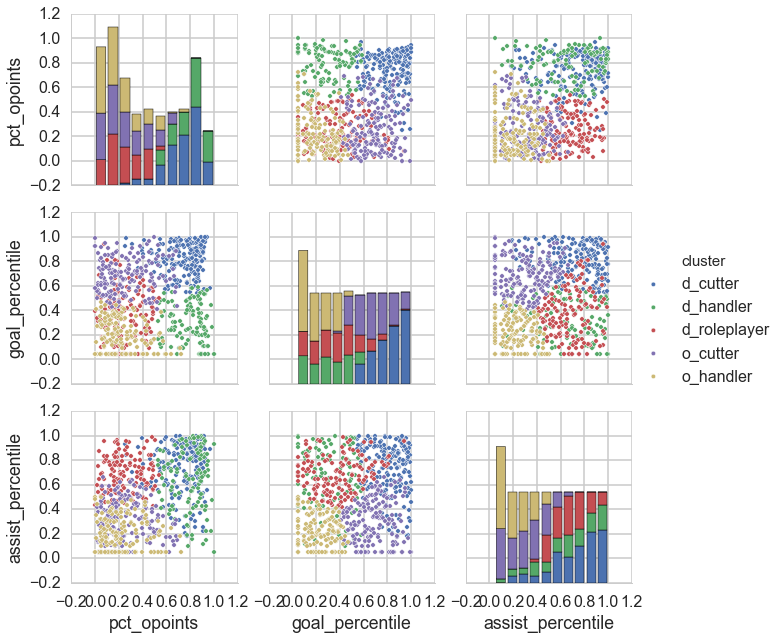

In [183]:
sns.pairplot(all_players, vars=["pct_opoints", "goal_percentile", "assist_percentile"], hue="cluster")

Investigating our clusters above we can see a few things. One of the first is that our suspicion about offensive/defensive players: we can see that the histogram for percentage of offensive points played is bimodal, with players tending to play their points on one particular side of the disc. We can also see the large group of defensive role players in the bottom corner of the plot. While it is unfortunate for classification that we cannot really tell if these players are handlers of cutters, it is necessary to do a 5-cluster model so that we have some method of identifying defensive handlers.

We also observe a very uniform distribution for the assist and goal percentiles - this is to be expected due to the nature of the fact that we trandformed the data into a percentile scale. Let's examine the data without the transformation.

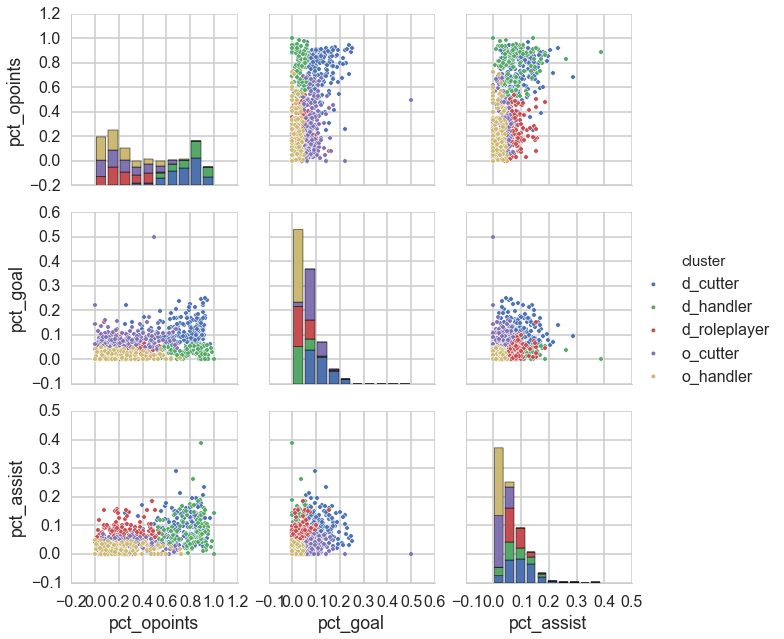

In [184]:
sns.pairplot(all_players, vars=["pct_opoints", "pct_goal", "pct_assist"], hue="cluster")


It is interesting to note that all of these data are very right-skewed. The majority of players have very low goal and assist percentages. This shows that the best players are racking up most of the goals and assists.

Another interesting observation lies within our "offensive cutter" cluster. This cluster not only has a high percentage of goals, but also a high percentage of assists. This goes to show that the best players at the profssional level are skilled on both sides of the disc. We can look at some of the best offensive cutters to see that they are both goal scoring and assist making machines.


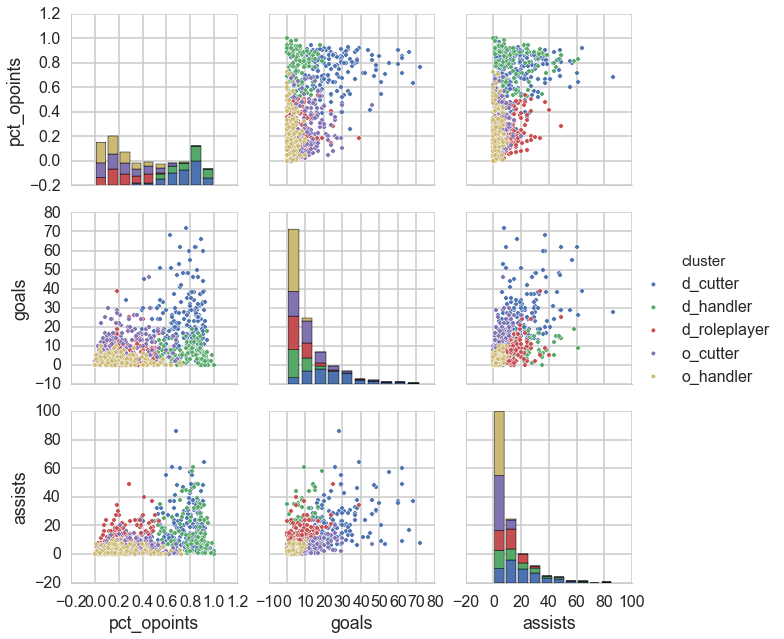

In [185]:
sns.pairplot(all_players, vars=["pct_opoints", "goals", "assists"], hue="cluster")

In [186]:
# top offensive cutters also tend to be great throwers
all_players.loc[["Kittre B", "Allen J", "DeGiro T"], ]

,team,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_goal,pct_assist,pct_d,goal_percentile,assist_percentile,cluster
Kittre B,,68,37,26,23,3,263,153,416,0.632212,0.163462,0.088942,0.062500,0.954955,0.777349,d_cutter
Allen J,,62,60,14,35,5,299,119,418,0.715311,0.148325,0.143541,0.033493,0.934363,0.934363,d_cutter
DeGiro T,,28,86,13,19,3,203,95,298,0.681208,0.093960,0.288591,0.043624,0.777992,0.998713,d_cutter


# Point Clustering

What makes a highlight point?

In [187]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.cluster import KMeans
from sklearn import datasets

from scipy.spatial.distance import cdist, euclidean
from scipy.stats import percentileofscore

pd.set_option('display.max_columns', None)

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

Using the point statistic table, we attempt to cluster by what makes a highlight point or not.

In [188]:
Xall=points[['turns', 'ds']].values
from sklearn.mixture import GMM
n_clusters=2
clfgmm = GMM(n_components=n_clusters, covariance_type="tied")
clfgmm.fit(Xall)
print clfgmm
gmm_means=clfgmm.means_
gmm_covar=clfgmm.covars_
print gmm_means, gmm_covar

GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
[[ 0.74518905  0.19676564]
 [ 4.70691983  1.00124591]] [[ 1.01157322  0.28019221]
 [ 0.28019221  0.23786601]]


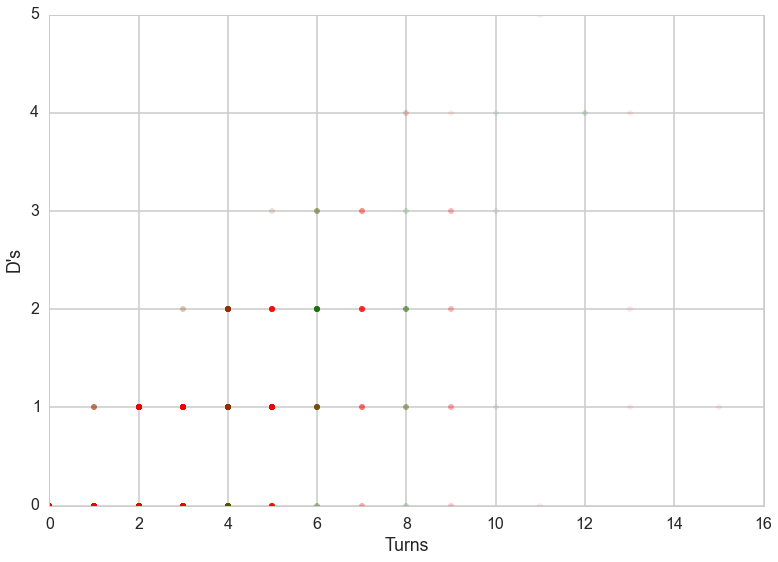

In [189]:
mask_hold = points.apply( lambda x :(x.offense == True and x.won == True), axis=1)
mask_break = points.apply( lambda x :(x.offense == True and x.won == False), axis=1)
plt.plot(points[mask_hold].turns, points[mask_hold].ds, '.', alpha=0.08, c='g')
plt.plot(points[mask_break].turns, points[mask_break].ds, '.', alpha=0.08, c='r')

plt.xlabel("Turns")
plt.ylabel("D's")

We thought that the more defense plays and the more turns in a point would make a point an exciting point.

In [192]:
from scipy import linalg

#function to plot ellipse
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell.set_clip_box(splot.bbox)
    ell1 = mpl.patches.Ellipse(mean, 1 * v[0] ** 0.5, 1 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell1.set_clip_box(splot.bbox)
    ell3 = mpl.patches.Ellipse(mean, 3 * v[0] ** 0.5, 3 * v[1] ** 0.5,
                              180 + angle, color=color, lw=3, fill=False)
    ell3.set_clip_box(splot.bbox)
    #ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.add_artist(ell1)
    splot.add_artist(ell3)

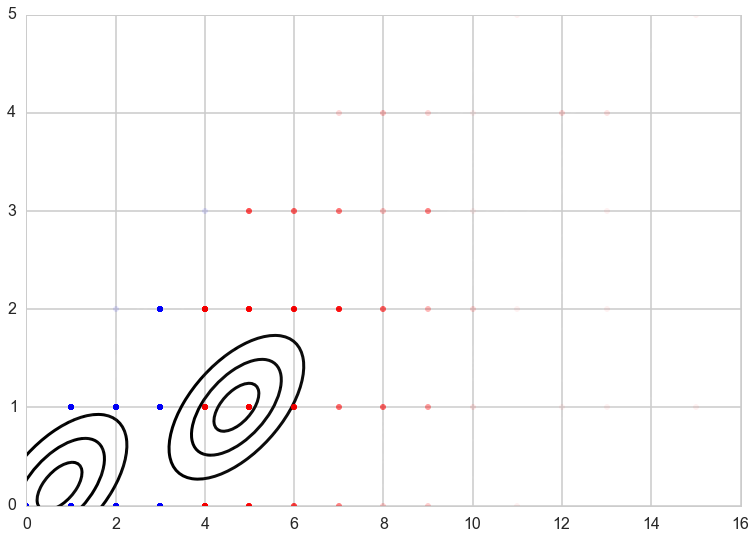

In [193]:
plt.figure()
ax=plt.gca()
plot_ellipse(ax, gmm_means[0], gmm_covar, 'k')
plot_ellipse(ax, gmm_means[1], gmm_covar, 'k')
gmm_labels=clfgmm.predict(Xall)

for k, col in zip(range(n_clusters), ['blue','red']):
    my_members = gmm_labels == k
    ax.plot(Xall[my_members, 0], Xall[my_members, 1], 'w',
            markerfacecolor=col, marker='.', alpha=0.05)

## Analysis

This clustering therefore does not demarkate breaks, but instead indicates good and bad points. However, the problem that is not solved is determine of those that are clustered in red, which ones are exciting points, and which of those are actually turn-filled points because of sloppy play or bad weather.

In [194]:
# try using k means
cluster_cols = points[["turns", "ds", "point_time"]]
model = KMeans(n_clusters=50).fit(cluster_cols.values)
points["cluster"] = model.labels_
points.groupby("cluster").count()

,ds,num_throws,offense,point_time,pull,pull-ob,pull_time,team,turns,won
cluster,,,,,,,,,,
0,1576,1576,1576,1576,1576,1576,628,1576,1576,1576
1,1,1,1,1,1,1,0,1,1,1
2,1,1,1,1,1,1,0,1,1,1
3,2,2,2,2,2,2,0,2,2,2
4,1,1,1,1,1,1,0,1,1,1
5,1,1,1,1,1,1,0,1,1,1
6,1,1,1,1,1,1,1,1,1,1
7,347,347,347,347,347,347,124,345,347,347
8,4,4,4,4,4,4,1,4,4,4


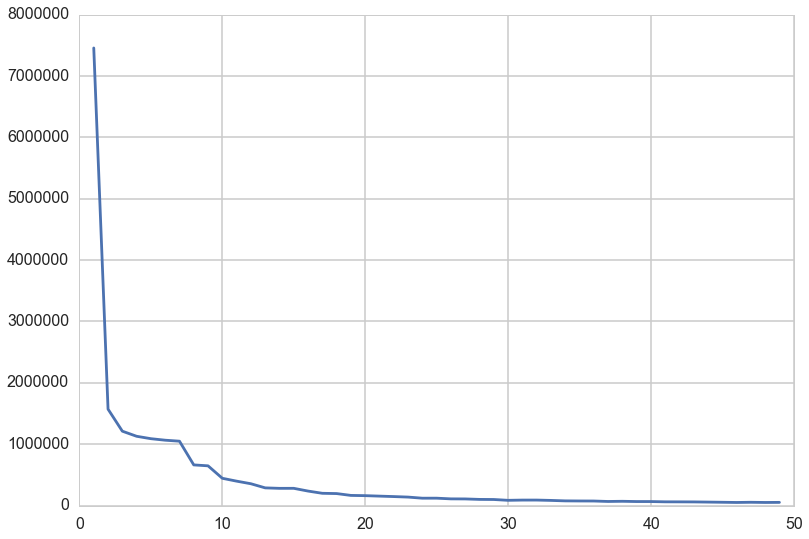

In [195]:
num_clusters = range(1, 50)
models = [KMeans(n_clusters = x) for x in num_clusters]
def score_from_model(model):
    predicted = model.fit_predict(cluster_cols.values)
    centroids = [model.cluster_centers_[x] for x in predicted]
    dist_sum = 0
    for i in range(0, len(predicted)):
        dist_sum += euclidean(cluster_cols.values[i], centroids[i])
    return dist_sum
scores = [score_from_model(model) for model in models]
scores

plt.plot(num_clusters, scores)

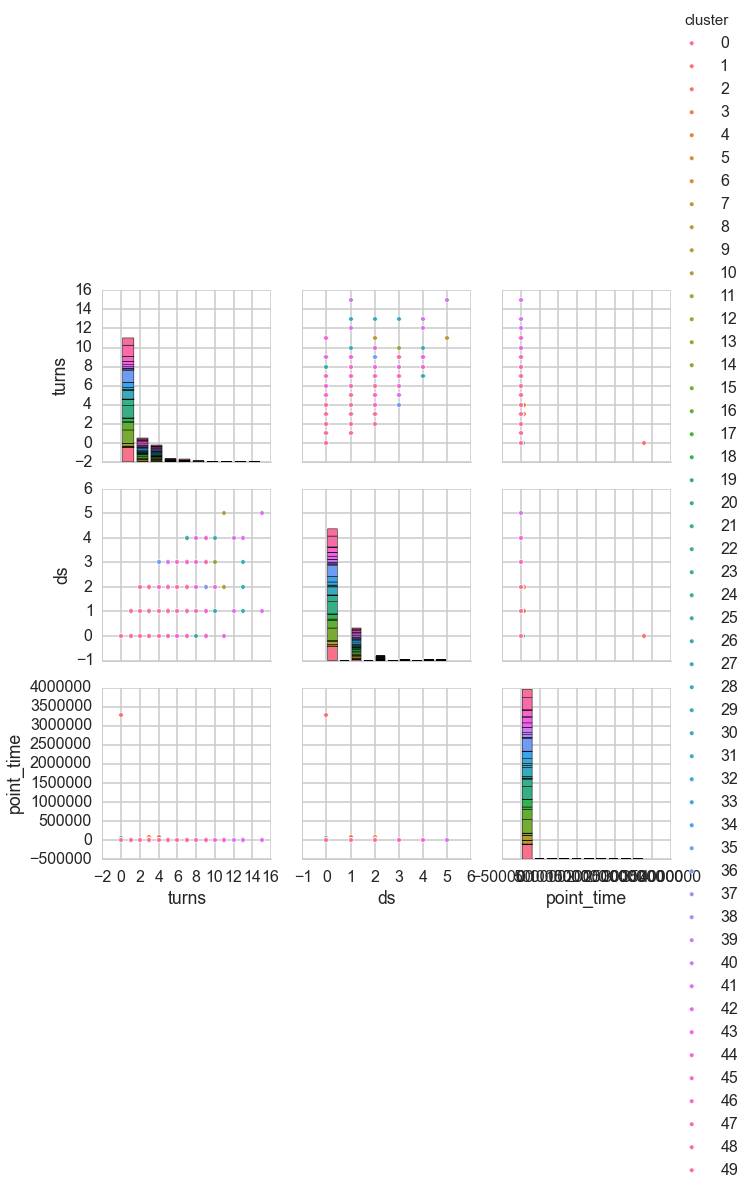

In [196]:
sns.pairplot(points, vars=["turns", "ds", "point_time"], hue="cluster")

EMILY ADD ANALYSIS

# Twitter Analysis

Refer to twitter_scrape.ipynb in the same folder to see how Twitter player mentions correlate with player statistics.